<a href="https://colab.research.google.com/github/Gatiwi93/Pronosticos/blob/main/Capitulo_5/Modelo_Promedio_M%C3%B3vil_Ponderado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cargar librerias y permitir acceso de drive

In [1]:
#Librerias
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.optimize import minimize

In [2]:
#Cargar Drive
drive.mount('/content/drive')

Mounted at /content/drive


##Recopilación de datos

##Conjunto de datos del [INEGI](https://www.inegi.org.mx/datosabiertos/)

In [3]:
# Ruta al archivo CSV en Google Drive
archivo_csv = '/content/drive/MyDrive/Recursos-Pronosticos/tr_inpp_indicador_mensual_2003_2024.csv'

In [4]:
# Cargar el archivo CSV en un DataFrame de Pandas
datos = pd.read_csv(archivo_csv)

In [5]:
datos

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
0,Nacional,Mensual,\t2003-01-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
1,Nacional,Mensual,\t2003-02-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
2,Nacional,Mensual,\t2003-03-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
3,Nacional,Mensual,\t2003-04-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
4,Nacional,Mensual,\t2003-05-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1519,Nacional,Mensual,\t2023-10-01,"Índice nacional de precios productor, Producci...",126.327149,Índice,Cifras definitivas
1520,Nacional,Mensual,\t2023-11-01,"Índice nacional de precios productor, Producci...",129.096047,Índice,Cifras definitivas
1521,Nacional,Mensual,\t2023-12-01,"Índice nacional de precios productor, Producci...",128.505843,Índice,Cifras definitivas
1522,Nacional,Mensual,\t2024-01-01,"Índice nacional de precios productor, Producci...",133.251450,Índice,Cifras definitivas


##Exploración de datos

In [6]:
#Valores únicos de la columna CONCEPTO del conjunto de datos INPP Mensual
datos['CONCEPTO'].unique()

array(['Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), INPP sin Petróleo y con Servicios',
       'Índice nacional de precios productor, Mercancías y Servicios Intermedios, Bienes intermedios, según quién los produce.',
       'Índice nacional de precios productor, Mercancías y servicios finales, Por origen, Mercancías y servicios finales, excluyendo petróleo.',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades terciarias',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades secundarias sin petróleo',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades primarias'],
      dtype=object)

##Procesamiento de datos

In [7]:
# Eliminar los valores nulos de la columna 'VALOR'
datos_sin_nulos = datos.dropna(subset=['VALOR'])

datos_sin_nulos

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
11,Nacional,Mensual,\t2003-12-01,"Índice nacional de precios productor, Producci...",48.573241,Índice,Cifras definitivas
12,Nacional,Mensual,\t2004-01-01,"Índice nacional de precios productor, Producci...",48.889453,Índice,Cifras definitivas
13,Nacional,Mensual,\t2004-02-01,"Índice nacional de precios productor, Producci...",49.478647,Índice,Cifras definitivas
14,Nacional,Mensual,\t2004-03-01,"Índice nacional de precios productor, Producci...",50.016838,Índice,Cifras definitivas
15,Nacional,Mensual,\t2004-04-01,"Índice nacional de precios productor, Producci...",50.496742,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1519,Nacional,Mensual,\t2023-10-01,"Índice nacional de precios productor, Producci...",126.327149,Índice,Cifras definitivas
1520,Nacional,Mensual,\t2023-11-01,"Índice nacional de precios productor, Producci...",129.096047,Índice,Cifras definitivas
1521,Nacional,Mensual,\t2023-12-01,"Índice nacional de precios productor, Producci...",128.505843,Índice,Cifras definitivas
1522,Nacional,Mensual,\t2024-01-01,"Índice nacional de precios productor, Producci...",133.251450,Índice,Cifras definitivas


In [8]:
datos_sin_nulos['CONCEPTO'].unique()

array(['Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), INPP sin Petróleo y con Servicios',
       'Índice nacional de precios productor, Mercancías y Servicios Intermedios, Bienes intermedios, según quién los produce.',
       'Índice nacional de precios productor, Mercancías y servicios finales, Por origen, Mercancías y servicios finales, excluyendo petróleo.',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades terciarias',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades secundarias sin petróleo',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades primarias'],
      dtype=object)

In [9]:
#Filtrar por el concepto de INPP Actividades Terciarias
Actividades_terciarias = datos[datos['CONCEPTO'] == 'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades terciarias']
Actividades_terciarias

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
762,Nacional,Mensual,\t2003-01-01,"Índice nacional de precios productor, Producci...",54.523010,Índice,Cifras definitivas
763,Nacional,Mensual,\t2003-02-01,"Índice nacional de precios productor, Producci...",54.857412,Índice,Cifras definitivas
764,Nacional,Mensual,\t2003-03-01,"Índice nacional de precios productor, Producci...",55.085203,Índice,Cifras definitivas
765,Nacional,Mensual,\t2003-04-01,"Índice nacional de precios productor, Producci...",55.284089,Índice,Cifras definitivas
766,Nacional,Mensual,\t2003-05-01,"Índice nacional de precios productor, Producci...",55.386873,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1011,Nacional,Mensual,\t2023-10-01,"Índice nacional de precios productor, Producci...",117.990492,Índice,Cifras definitivas
1012,Nacional,Mensual,\t2023-11-01,"Índice nacional de precios productor, Producci...",118.202164,Índice,Cifras definitivas
1013,Nacional,Mensual,\t2023-12-01,"Índice nacional de precios productor, Producci...",119.069196,Índice,Cifras definitivas
1014,Nacional,Mensual,\t2024-01-01,"Índice nacional de precios productor, Producci...",119.141929,Índice,Cifras definitivas


In [11]:
Actividades_terciarias

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
762,Nacional,Mensual,2003-01-01,"Índice nacional de precios productor, Producci...",54.523010,Índice,Cifras definitivas
763,Nacional,Mensual,2003-02-01,"Índice nacional de precios productor, Producci...",54.857412,Índice,Cifras definitivas
764,Nacional,Mensual,2003-03-01,"Índice nacional de precios productor, Producci...",55.085203,Índice,Cifras definitivas
765,Nacional,Mensual,2003-04-01,"Índice nacional de precios productor, Producci...",55.284089,Índice,Cifras definitivas
766,Nacional,Mensual,2003-05-01,"Índice nacional de precios productor, Producci...",55.386873,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1011,Nacional,Mensual,2023-10-01,"Índice nacional de precios productor, Producci...",117.990492,Índice,Cifras definitivas
1012,Nacional,Mensual,2023-11-01,"Índice nacional de precios productor, Producci...",118.202164,Índice,Cifras definitivas
1013,Nacional,Mensual,2023-12-01,"Índice nacional de precios productor, Producci...",119.069196,Índice,Cifras definitivas
1014,Nacional,Mensual,2024-01-01,"Índice nacional de precios productor, Producci...",119.141929,Índice,Cifras definitivas


##Modelo de Promedio Móvil Ponderado

In [12]:
# Función para calcular el Promedio Móvil Ponderado (WMA)
def wma(values, weights):
    return sum(value * weight for value, weight in zip(values, weights))

In [13]:
# Función objetivo para minimizar el MSE
def objective(weights, values):
    wma_values = values.rolling(window=len(weights)).apply(lambda prices: wma(prices, weights), raw=True)
    return np.mean((values - wma_values)**2)

In [14]:
# Condiciones iniciales para los pesos
initial_weights = [0.2, 0.3, 0.5]

In [15]:
# Minimizar la función objetivo para encontrar los pesos óptimos
result = minimize(objective, initial_weights, args=(Actividades_terciarias['VALOR'],),
                  bounds=[(0, 1)] * len(initial_weights),
                  constraints={'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

In [16]:
#Asignar los pesos optimos a una variable
optimal_weights = result.x

In [19]:
# Calcular el WMA con los pesos óptimos
Actividades_terciarias.loc[:, 'WMA'] = Actividades_terciarias['VALOR'].rolling(window=len(optimal_weights)).apply(lambda prices: wma(prices, optimal_weights), raw=True)

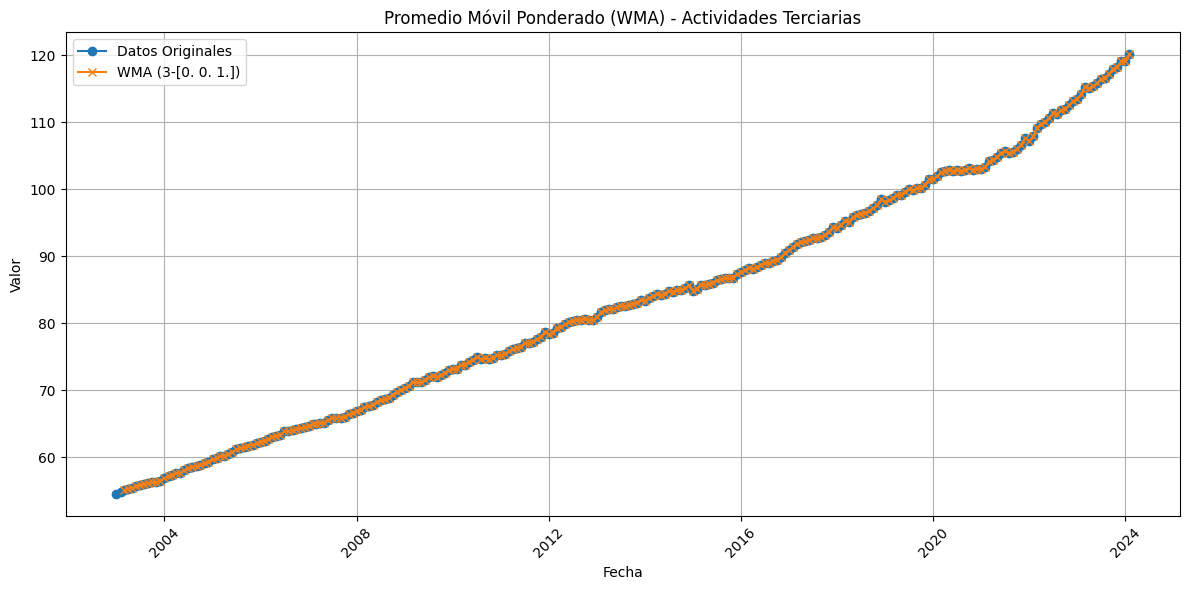

In [20]:
# Graficar los datos originales y el WMA
plt.figure(figsize=(12, 6))
plt.plot(Actividades_terciarias['FECHA'], Actividades_terciarias['VALOR'], label='Datos Originales', marker='o')
plt.plot(Actividades_terciarias['FECHA'], Actividades_terciarias['WMA'], label=f'WMA ({len(optimal_weights)}-{optimal_weights.round(2)})', marker='x')
plt.title('Promedio Móvil Ponderado (WMA) - Actividades Terciarias')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()